# ***Company Attribute Normalization System ***
# This system helps normalize attributes between different company datasets using semantic similarity

# 1. Required Package Installation

In [3]:
pip install pandas sentence-transformers numpy matplotlib seaborn

# 2. Import Required Libraries
# These libraries will help us process data and compute similarities

In [4]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Main Attribute Normalizer Class**
# This class handles the detection and normalization of similar attributes between datasets

In [5]:
class AttributeNormalizer:
    def __init__(self, similarity_threshold: float = 0.75):
        """
        Initialize with a similarity threshold (0-1) that determines how similar attributes need to be to match
        """
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        self.similarity_threshold = similarity_threshold
        self.standard_terms = {}

    def find_similar_attributes(self, df1: pd.DataFrame, df2: pd.DataFrame) -> Dict[str, List[str]]:
        """
        Find similar attributes between two dataframes using semantic similarity
        """
        # Get all column names
        cols1 = list(df1.columns)
        cols2 = list(df2.columns)
        all_cols = cols1 + cols2

        # Compute embeddings for all columns
        embeddings = self.model.encode(all_cols, convert_to_tensor=True)

        # Compute similarity matrix
        similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings)

        # Find groups of similar attributes
        similar_attributes = {}
        processed_cols = set()

        for i, col1 in enumerate(all_cols):
            if col1 in processed_cols:
                continue

            similar_cols = []
            for j, col2 in enumerate(all_cols):
                if i != j and similarity_matrix[i][j] >= self.similarity_threshold:
                    similar_cols.append(col2)
                    processed_cols.add(col2)

            if similar_cols:
                # Use the shortest name as the standard term
                standard_term = min([col1] + similar_cols, key=len)
                similar_attributes[standard_term] = [col1] + similar_cols
                processed_cols.add(col1)
            elif col1 not in processed_cols:
                similar_attributes[col1] = [col1]
                processed_cols.add(col1)

        return similar_attributes

    def normalize_datasets(self, df1: pd.DataFrame, df2: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Normalize both datasets based on detected similar attributes
        """
        # Find similar attributes
        self.standard_terms = self.find_similar_attributes(df1, df2)

        # Create mapping dictionaries for both dataframes
        mapping1 = {}
        mapping2 = {}

        for standard_term, variations in self.standard_terms.items():
            for variation in variations:
                if variation in df1.columns:
                    mapping1[variation] = standard_term
                if variation in df2.columns:
                    mapping2[variation] = standard_term

        # Create normalized copies of the dataframes
        normalized_df1 = df1.copy()
        normalized_df2 = df2.copy()

        # Rename columns
        normalized_df1.rename(columns=mapping1, inplace=True)
        normalized_df2.rename(columns=mapping2, inplace=True)

        return normalized_df1, normalized_df2

    def visualize_similarity_matrix(self, df1: pd.DataFrame, df2: pd.DataFrame):
        """
        Create a heatmap visualization of attribute similarities
        """
        cols1 = list(df1.columns)
        cols2 = list(df2.columns)
        all_cols = cols1 + cols2

        embeddings = self.model.encode(all_cols, convert_to_tensor=True)
        similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

        plt.figure(figsize=(12, 8))
        sns.heatmap(similarity_matrix,
                    xticklabels=all_cols,
                    yticklabels=all_cols,
                    cmap='YlOrRd',
                    vmin=0,
                    vmax=1)
        plt.title('Attribute Similarity Matrix')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

# 4. Create Example Datasets
# Here we create sample data to demonstrate the normalization process

In [11]:
data1 = pd.read_csv('/content/Employee.csv')

# Company B data with different column names
data2 = pd.read_csv('/content/employee_data.csv')

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 5. Using the Normalizer
# Initialize and use the normalizer to standardize the datasets

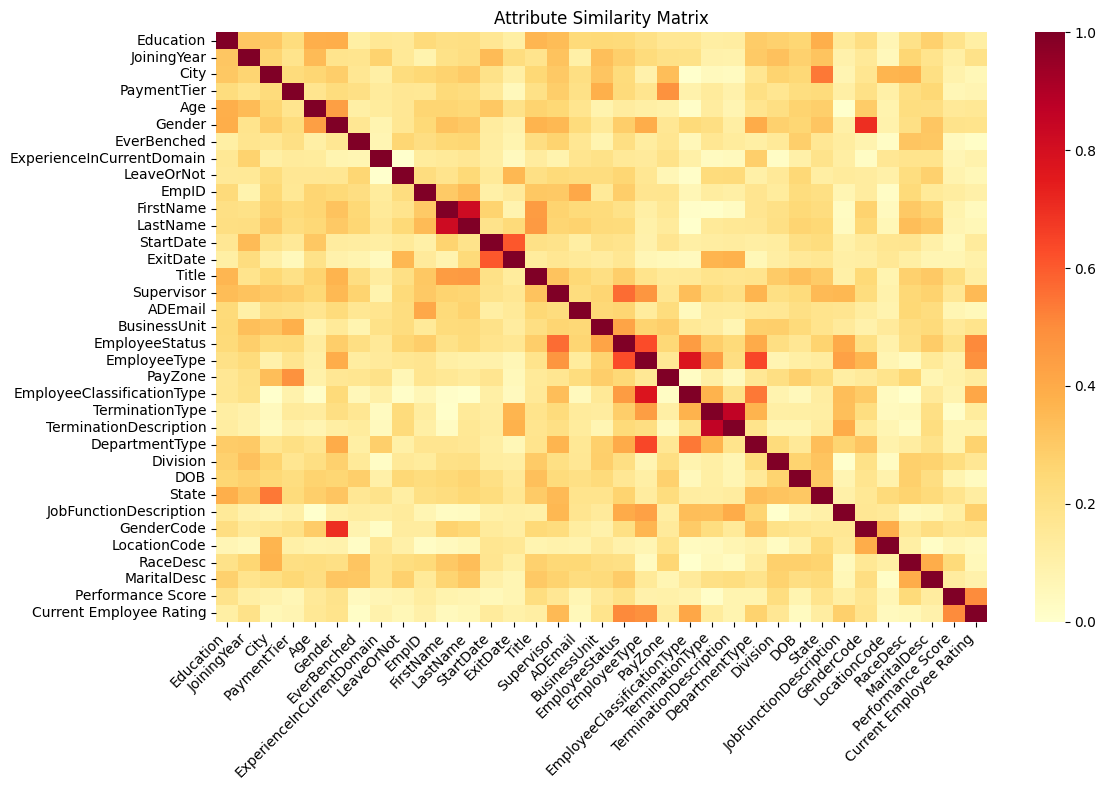


Standard term: Education
Variations: ['Education']

Standard term: JoiningYear
Variations: ['JoiningYear']

Standard term: City
Variations: ['City']

Standard term: PaymentTier
Variations: ['PaymentTier']

Standard term: Age
Variations: ['Age']

Standard term: Gender
Variations: ['Gender']

Standard term: EverBenched
Variations: ['EverBenched']

Standard term: ExperienceInCurrentDomain
Variations: ['ExperienceInCurrentDomain']

Standard term: LeaveOrNot
Variations: ['LeaveOrNot']

Standard term: EmpID
Variations: ['EmpID']

Standard term: LastName
Variations: ['FirstName', 'LastName']

Standard term: StartDate
Variations: ['StartDate']

Standard term: ExitDate
Variations: ['ExitDate']

Standard term: Title
Variations: ['Title']

Standard term: Supervisor
Variations: ['Supervisor']

Standard term: ADEmail
Variations: ['ADEmail']

Standard term: BusinessUnit
Variations: ['BusinessUnit']

Standard term: EmployeeStatus
Variations: ['EmployeeStatus']

Standard term: EmployeeType
Variations

In [12]:
# Create normalizer instance
normalizer = AttributeNormalizer(similarity_threshold=0.75)

# Normalize the datasets
normalized_df1, normalized_df2 = normalizer.normalize_datasets(df1, df2)

# Visualize similarities
normalizer.visualize_similarity_matrix(df1, df2)

# Print the matched attribute groups
# Instead of calling get_attribute_groups(), access the standard_terms attribute directly
attribute_groups = normalizer.standard_terms
for standard_term, variations in attribute_groups.items():
    print(f"\nStandard term: {standard_term}")
    print(f"Variations: {variations}")

# Display normalized datasets
print("\nNormalized Dataset 1:")
print(normalized_df1)
print("\nNormalized Dataset 2:")
print(normalized_df2)

# 6. Analyze Results

 Compare the original and normalized column names

In [13]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Company A - Original': pd.Series(df1.columns),
    'Company A - Normalized': pd.Series(normalized_df1.columns),
    'Company B - Original': pd.Series(df2.columns),
    'Company B - Normalized': pd.Series(normalized_df2.columns)
})

print("Column Name Comparison:")
print(comparison_df)

# Calculate normalization statistics
total_columns = len(df1.columns) + len(df2.columns)
normalized_columns = len(set(normalized_df1.columns) | set(normalized_df2.columns))
reduction_percentage = ((total_columns - normalized_columns) / total_columns) * 100

print(f"\nNormalization Statistics:")
print(f"Original total columns: {total_columns}")
print(f"Normalized unique columns: {normalized_columns}")
print(f"Column reduction: {reduction_percentage:.1f}%")

Column Name Comparison:
         Company A - Original     Company A - Normalized  \
0                   Education                  Education   
1                 JoiningYear                JoiningYear   
2                        City                       City   
3                 PaymentTier                PaymentTier   
4                         Age                        Age   
5                      Gender                     Gender   
6                 EverBenched                EverBenched   
7   ExperienceInCurrentDomain  ExperienceInCurrentDomain   
8                  LeaveOrNot                 LeaveOrNot   
9                         NaN                        NaN   
10                        NaN                        NaN   
11                        NaN                        NaN   
12                        NaN                        NaN   
13                        NaN                        NaN   
14                        NaN                        NaN   
15              